In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import seaborn as sn 
import matplotlib.pyplot as plt 

**Importing the dataset**

In [10]:
df=pd.read_csv('/content/Social_Network_Ads (1).csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.shape

(400, 5)

In [15]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [14]:
df = df.drop_duplicates()
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [20]:
X = df.loc[:,df.columns[2:]]
y = df['Gender']
y = y.map({'Male':1, 'Female':0})

In [21]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

**Splitting the dataset into the Training set and Test set**

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Feature Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
x_test = std.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [28]:
from sklearn.tree import DecisionTreeClassifier

dect = DecisionTreeClassifier()
dect.fit(X_train, y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [30]:
y_pred = dect.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test set accuracy: 0.56
Test set auc: 0.50
Train set AUC :  0.9602649006622517


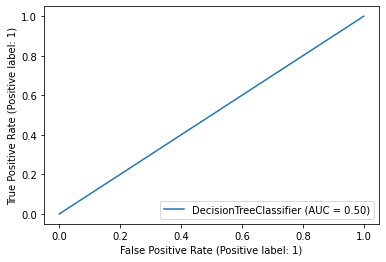

In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dect.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dect, X_test, y_test)


acc = roc_auc_score(y_train, dect.predict(X_train))
print("Train set AUC : ", acc)

**Making the Confusion Matrix**

In [31]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
confusion_matrix(y_test,y_pred)

array([[ 0, 35],
       [ 0, 45]])

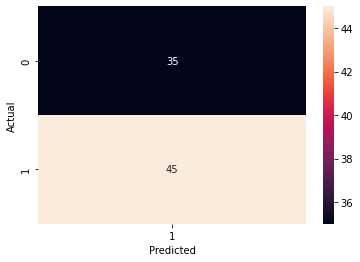

In [32]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

[Text(0.8072667738970588, 0.9772727272727273, 'X[1] <= 1.154\ngini = 0.498\nsamples = 320\nvalue = [169, 151]'),
 Text(0.6498276654411764, 0.9318181818181818, 'X[0] <= 1.185\ngini = 0.5\nsamples = 273\nvalue = [137, 136]'),
 Text(0.4290670955882353, 0.8863636363636364, 'X[1] <= -1.496\ngini = 0.499\nsamples = 244\nvalue = [117, 127]'),
 Text(0.1, 0.8409090909090909, 'X[1] <= -1.588\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.09215686274509804, 0.7954545454545454, 'X[0] <= -0.665\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.08431372549019608, 0.75, 'X[0] <= -0.859\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.07647058823529412, 0.7045454545454546, 'X[0] <= -1.054\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.06862745098039216, 0.6590909090909091, 'X[1] <= -1.649\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.060784313725490195, 0.6136363636363636, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07647058823529412, 0.6136363636363636, 'gini = 0

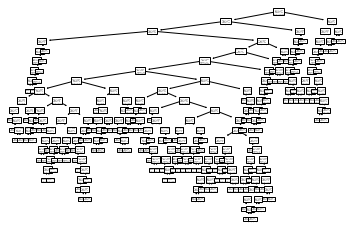

In [33]:
from sklearn import tree
tree.plot_tree(dect)

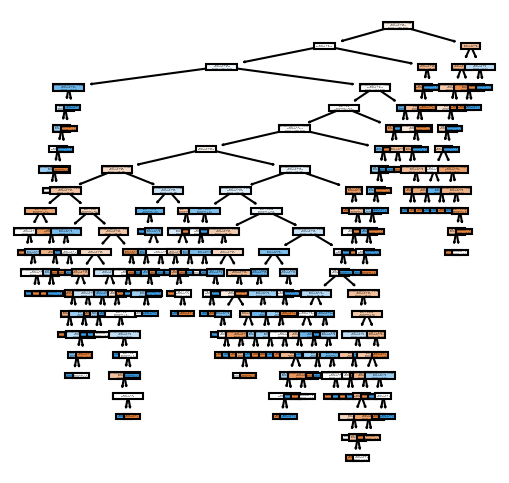

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=150)
tree.plot_tree(dect,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')